In [1]:
import os
import time
import numpy as np
import pandas as pd
import pywt
import pathlib
import pickle
from itertools import product
from scipy.stats import skew, kurtosis, entropy
from scipy.signal import butter, welch, filtfilt, resample
import math
import nolds
import matplotlib.pyplot as plt

In [2]:
# set path to folder containing clinic watch data
clinicpath = r'//FS2.smpp.local\\RTO\\CIS-PD Study\MJFF Curation\Finalized Dataset'
# set path to folder containing home watch data
homepath = r'//FS2.smpp.local\\RTO\\CIS-PD Study\Patient Record Correlation'
# set path to destination folder
dest = r'//FS2.smpp.local\\RTO\\CIS-PD Study\Watch Features Data'
#---------------------------------------------------------------------------------------------------------

In [3]:
# visualize acceleratin

file = '1032_2_RamR'

data_clip = (pd.read_csv(os.path.join(clinicpath, 'Table8', 'TaskAcc', file + '.csv'), parse_dates = ['timestamp'])
             [['timestamp', 'x', 'y', 'z']])
data_clip.columns = ['Timestamp', 'X', 'Y', 'Z']

rawdata = data_clip[['X', 'Y', 'Z']]
rawdata_wmag = rawdata.copy()
rawdata_wmag['Accel_Mag'] = np.sort((rawdata**2).sum(axis = 1))
rawdata_wmag['Accel_Mag'] = (rawdata**2).sum(axis = 1)

plt.plot(data_clip.Timestamp, rawdata_wmag.Accel_Mag)

x = rawdata_wmag.iloc[:, -1]
n = len(x)
Fs = np.mean(1 / (np.diff(x.index) / 1000))
f, Pxx_den = welch(x, Fs, nperseg = min(256, n))
inds = (f <= 10) & (f >= 0)
f = f[inds]
Pxx_den = Pxx_den[inds]

Pxxdf = pd.DataFrame(data = Pxx_den, index = f, columns = ['PSD_magnitude'])
print(Pxxdf.loc[7.81250].values / Pxxdf.iloc[:, -1].sum())
Pxxdf

freq1 = Pxxdf.iloc[:, -1].index[-1]
freq2 = Pxxdf.iloc[:, -1].index[-2]
freq3 = Pxxdf.iloc[:, -1].index[-3]
domfreq = np.array([freq1, freq2, freq3])
domfreq

FileNotFoundError: [Errno 2] File b'//FS2.smpp.local\\\\RTO\\\\CIS-PD Study\\MJFF Curation\\Finalized Dataset\\Table8\\TaskAcc\\1032_2_RamR.csv' does not exist: b'//FS2.smpp.local\\\\RTO\\\\CIS-PD Study\\MJFF Curation\\Finalized Dataset\\Table8\\TaskAcc\\1032_2_RamR.csv'

C:\Users\rpieper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


,PSD_magnitude
0.00000,0.000011
3.90625,0.000045
7.81250,0.000060


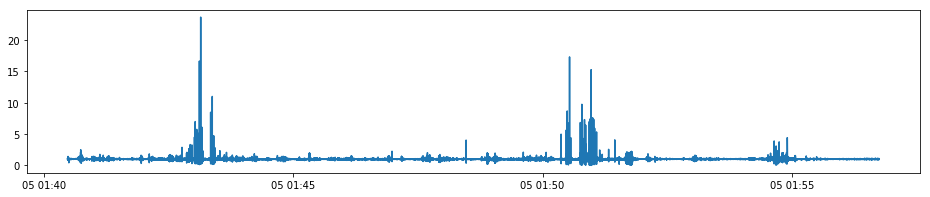

In [4]:
data_clip = (pd.read_csv(os.path.join(homepath, 'Symptom Reports', '1048', '2017-11', '05', '015645.csv'), 
                         parse_dates = ['Timestamp'])
             [['Timestamp', 'X', 'Y', 'Z']])
data_clip.columns = ['Timestamp', 'X', 'Y', 'Z']

rawdata = data_clip[['X', 'Y', 'Z']]
rawdata_wmag = rawdata.copy()
rawdata_wmag['Accel_Mag'] = np.sort((rawdata**2).sum(axis = 1))
rawdata_wmag['Accel_Mag'] = (rawdata**2).sum(axis = 1)

plt.figure(figsize = (16, 3))
plt.plot(data_clip.Timestamp, rawdata_wmag.Accel_Mag)

x = rawdata_wmag.iloc[:, -1]
n = len(x)
Fs = np.mean(1 / (np.diff(x.index) / 1000))
f, Pxx_den = welch(x, Fs, nperseg = min(256, n))
inds = (f <= 10) & (f >= 0)
f = f[inds]
Pxx_den = Pxx_den[inds]

Pxxdf = pd.DataFrame(data = Pxx_den, index = f, columns = ['PSD_magnitude'])
Pxxdf